# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
from sklearn.preprocessing import OneHotEncoder

# Import Dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID is irrelevant, so we'll exclude the column.

# Encoding Gender

In [4]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(dataset['Genre'].values.reshape((-1,1)))

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [5]:
encoded_cols = list(encoder.get_feature_names())
encoded_cols

['x0_Female', 'x0_Male']

In [6]:
categorical_col = ['Genre']
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [7]:
dataset[numerical_cols + categorical_col]

,Age,Annual Income (k$),Spending Score (1-100),Genre
0,19,15,39,Male
1,21,15,81,Male
2,20,16,6,Female
3,23,16,77,Female
4,31,17,40,Female
...,...,...,...,...
195,35,120,79,Female
196,45,126,28,Female
197,32,126,74,Male
198,32,137,18,Male


In [8]:
X = dataset[categorical_col + numerical_cols].copy()

In [9]:
X[encoded_cols] = encoder.transform( X['Genre'].values.reshape((-1,1)) )

In [10]:
X = X[numerical_cols + encoded_cols]
X

,Age,Annual Income (k$),Spending Score (1-100),x0_Female,x0_Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0
3,23,16,77,1.0,0.0
4,31,17,40,1.0,0.0
...,...,...,...,...,...
195,35,120,79,1.0,0.0
196,45,126,28,1.0,0.0
197,32,126,74,0.0,1.0
198,32,137,18,0.0,1.0


# Find Optimal Numer of Clusters (k) using Elbow Method

In [11]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(i, init='k-means++', random_state=42)
    kmeans.fit(X)    
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[308911.33999999997,
 212938.71508951415,
 143440.43314900767,
 104463.19922884135,
 75476.65900773824,
 58396.839405039405,
 51620.755829155816,
 44406.80047021942,
 40990.03255798255,
 37563.16679431678]

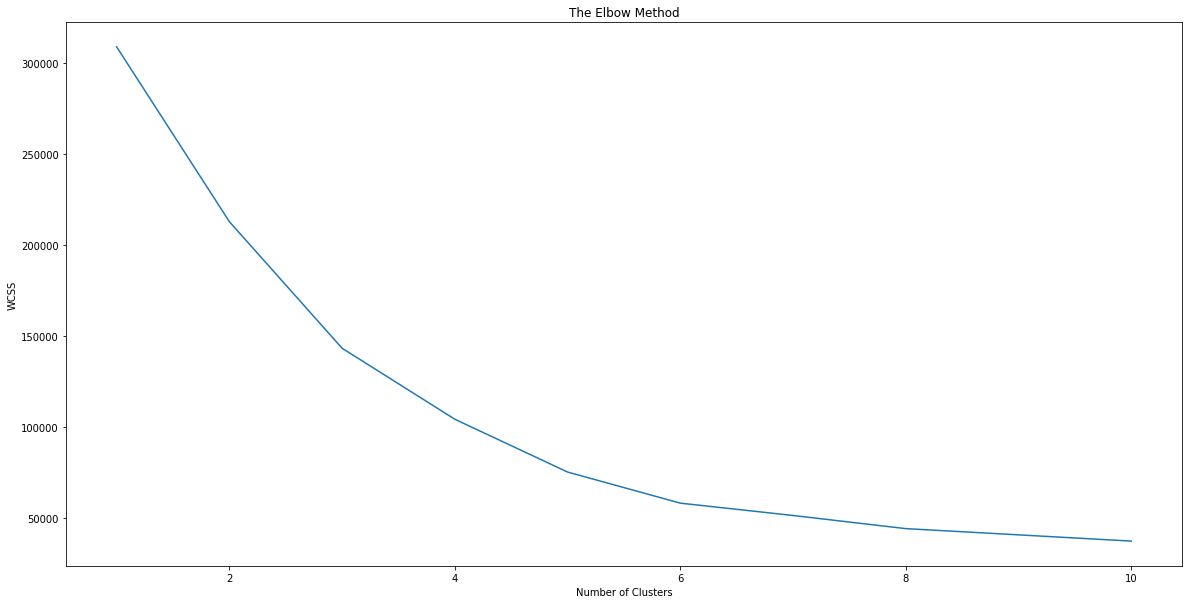

In [13]:
plt.figure(figsize=(20, 10));
plt.plot(range(1,11), wcss);
plt.title('The Elbow Method');
plt.xlabel('Number of Clusters');
plt.ylabel('WCSS');
plt.show()

From the graph, it can be seen that k=5 is optimal.<br>
Therefore, there are 5 clusters namely 1, 2, 3, 4, 5.<br>
That is, there are 5 groups of customers in the mall.<br>

# Training K-Means

In [14]:
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++', verbose=1)
y = kmeans.fit_predict(X)

Initialization complete
Iteration 0, inertia 131387.0
Iteration 1, inertia 91682.81860222615
Iteration 2, inertia 82590.3925376669
Iteration 3, inertia 77047.62612612575
Iteration 4, inertia 75648.24880768577
Iteration 5, inertia 75591.70279006516
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 109034.0
Iteration 1, inertia 76588.2184632443
Iteration 2, inertia 75612.26831529124
Iteration 3, inertia 75591.70279006516
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 116102.0
Iteration 1, inertia 83816.5045452081
Iteration 2, inertia 79691.84615662957
Iteration 3, inertia 79374.4232763934
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 122836.0
Iteration 1, inertia 83671.00131870726
Iteration 2, inertia 79680.44425369665
Iteration 3, inertia 79374.4232763934
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 122059.0
Itera

In [15]:
y

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [16]:
dataset['Categories'] = pd.DataFrame(y)

In [17]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Categories
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


# Visualizing the Clusters (Using Only Annual Income & Spending Score Features)

In [18]:
dataset[dataset['Categories'] == 0]['Spending Score (1-100)']

0     39
2      6
4     40
6      6
8      3
10    14
12    15
14    13
16    35
18    29
20    35
22     5
24    14
26    32
28    31
30     4
32     4
34    14
36    17
38    26
40    35
42    36
44    28
Name: Spending Score (1-100), dtype: int64

In [19]:
X

,Age,Annual Income (k$),Spending Score (1-100),x0_Female,x0_Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0
3,23,16,77,1.0,0.0
4,31,17,40,1.0,0.0
...,...,...,...,...,...
195,35,120,79,1.0,0.0
196,45,126,28,1.0,0.0
197,32,126,74,0.0,1.0
198,32,137,18,0.0,1.0


In [20]:
y

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [21]:
X[y==0]['Spending Score (1-100)']

0     39
2      6
4     40
6      6
8      3
10    14
12    15
14    13
16    35
18    29
20    35
22     5
24    14
26    32
28    31
30     4
32     4
34    14
36    17
38    26
40    35
42    36
44    28
Name: Spending Score (1-100), dtype: int64

In [22]:
kmeans.cluster_centers_

array([[45.2173913 , 26.30434783, 20.91304348,  0.60869565,  0.39130435],
       [32.69230769, 86.53846154, 82.12820513,  0.53846154,  0.46153846],
       [40.32432432, 87.43243243, 18.18918919,  0.48648649,  0.51351351],
       [43.12658228, 54.82278481, 49.83544304,  0.58227848,  0.41772152],
       [25.27272727, 25.72727273, 79.36363636,  0.59090909,  0.40909091]])

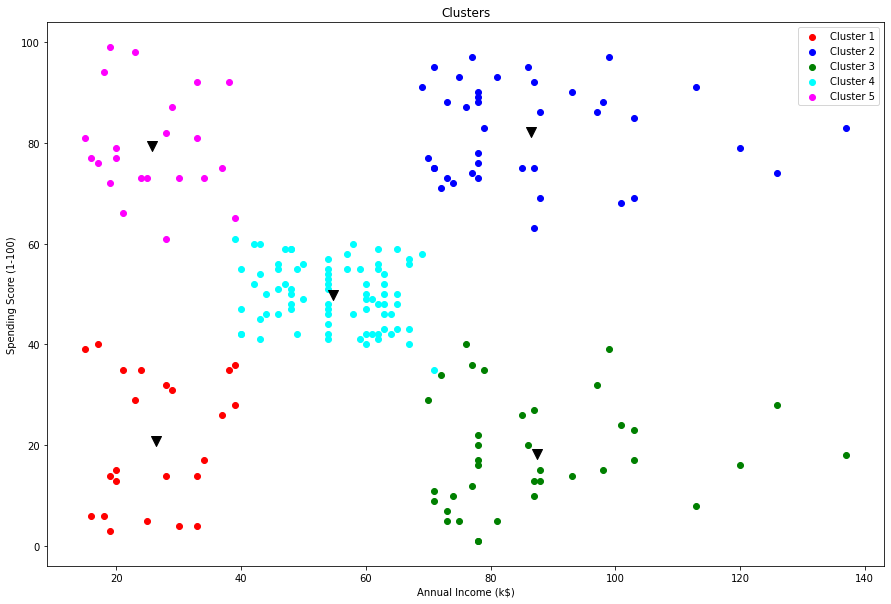

In [23]:
plt.figure(figsize=(15, 10));
plt.scatter(X[y==0]['Annual Income (k$)'], X[y==0]['Spending Score (1-100)'],c='red', label='Cluster 1');
plt.scatter(X[y==1]['Annual Income (k$)'], X[y==1]['Spending Score (1-100)'],c='blue', label='Cluster 2');
plt.scatter(X[y==2]['Annual Income (k$)'], X[y==2]['Spending Score (1-100)'],c='green', label='Cluster 3');
plt.scatter(X[y==3]['Annual Income (k$)'], X[y==3]['Spending Score (1-100)'],c='cyan', label='Cluster 4');
plt.scatter(X[y==4]['Annual Income (k$)'], X[y==4]['Spending Score (1-100)'],c='magenta', label='Cluster 5');
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2],c='black', marker='v', s=100, label='Centroids');

plt.title('Clusters')
plt.xlabel('Annual Income (k$)');
plt.ylabel('Spending Score (1-100)');
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']);
plt.show();

# Analysis
- Cluster 3 (Green) : People with low annual income and who spends lower in the mall. These are customers still less targeted.
<br><br>
- Cluster 2 (Blue) : People with high annual income and who still doesn't spend much money in the mall. These customers can be targeted so that they can be tempted to spend more in the mall. These are the customers with 3rd priority to be targeted (1 - Cluster 5, 2 - Cluster 2).
<br><br>
- Cluster 4 (Cyan) : People with low annual income and who spend a lot in the mall. These Customers are less targeted by the mall (if the mall wishes to so that the people with low income doesn't need to spend too much in the mall - ethics).
<br><br>
- Cluster 5 (Magenta) : People with higher annual income and who spends more in the mall. These customers are likely to buy more in the mall so they are the priority targets for the mall.
<br><br>
- Cluster 1 (Red) : People with average annual income and spends averagely in the mall.